In [1]:
!pip install polars datetime pathlib pyarrow 

## Ada sol eth btc short (8-5-2023 to 12-31-2023)

In [2]:
import polars as pl
from pathlib import Path
import datetime

# ─── PARAMETERS ───────────────────────────────────────────────────────────────
INPUT_PATH  = Path("/Users/jadenfix/Downloads/cleaned_btc_data.csv")
OUTPUT_PATH = Path("/Users/jadenfix/Downloads/training_data_btc.csv")

DATE_COL    = "date_only"
TIME_COL    = "time_only"

SHORT_START = datetime.date(2023, 8, 5)
SHORT_END   = datetime.date(2023, 12, 31)

# ─── LOAD & FORMAT ────────────────────────────────────────────────────────────
df = (
    pl.read_csv(INPUT_PATH)
      .with_columns([
          # parse M/D/YY → Date (writes YYYY-MM-DD)
          pl.col(DATE_COL)
            .str.strptime(pl.Date, "%m/%d/%y", strict=False)
            .alias(DATE_COL),
          # zero-pad time_only to HH:MM:SS
          pl.col(TIME_COL)
            .map_elements(lambda s: s.zfill(8), return_dtype=pl.Utf8)
            .alias(TIME_COL),
      ])
)

# ─── FILTER & WRITE ───────────────────────────────────────────────────────────
df_short = df.filter(
    (pl.col(DATE_COL) >= SHORT_START) &
    (pl.col(DATE_COL) <= SHORT_END)
)

df_short.write_csv(OUTPUT_PATH)
print(f"Wrote {df_short.height} rows to {OUTPUT_PATH.name}")

/var/folders/lk/4ym49gg94jz0bf7w8jnp_wnh0000gp/T/ipykernel_71954/2632198144.py:25: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("time_only").map_elements(lambda s: ...)
with this one instead:
  + pl.col("time_only").str.zfill(8)

  .map_elements(lambda s: s.zfill(8), return_dtype=pl.Utf8)


Wrote 214560 rows to training_data_btc.csv


In [3]:
import polars as pl
from pathlib import Path
import datetime

# ─── PARAMETERS ───────────────────────────────────────────────────────────────
INPUT_DIR  = Path("/Users/jadenfix/Downloads")
OUTPUT_DIR = Path("/Users/jadenfix/Downloads")

COINS      = ["eth", "ada", "solana"]
DATE_COL   = "date_only"
TIME_COL   = "time_only"

SHORT_START = datetime.date(2023, 8, 5)
SHORT_END   = datetime.date(2023, 12, 31)

for coin in COINS:
    input_path  = INPUT_DIR / f"cleaned_{coin}_data.csv"
    output_path = OUTPUT_DIR / f"training_data_{coin}.csv"

    df = (
        pl.read_csv(input_path)
          .with_columns([
              pl.col(DATE_COL)
                .str.strptime(pl.Date, "%m/%d/%y", strict=False)
                .alias(DATE_COL),
              pl.col(TIME_COL)
                .map_elements(lambda s: s.zfill(8), return_dtype=pl.Utf8)
                .alias(TIME_COL),
          ])
    )

    df_short = df.filter(
        (pl.col(DATE_COL) >= SHORT_START) &
        (pl.col(DATE_COL) <= SHORT_END)
    )

    df_short.write_csv(output_path)
    print(f"Wrote {df_short.height} rows to {output_path.name}")

/var/folders/lk/4ym49gg94jz0bf7w8jnp_wnh0000gp/T/ipykernel_71954/3977565338.py:27: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("time_only").map_elements(lambda s: ...)
with this one instead:
  + pl.col("time_only").str.zfill(8)

  .map_elements(lambda s: s.zfill(8), return_dtype=pl.Utf8)


Wrote 214560 rows to training_data_eth.csv
Wrote 214560 rows to training_data_ada.csv
Wrote 214560 rows to training_data_solana.csv


## ADA SOL ETH Long (8-12-2020 to 12-31-2023)

In [4]:
import polars as pl
from pathlib import Path
import datetime

# ─── PARAMETERS ───────────────────────────────────────────────────────────────
INPUT_DIR  = Path("/Users/jadenfix/Downloads")
OUTPUT_DIR = Path("/Users/jadenfix/Downloads")

COINS      = ["eth", "ada", "solana"]
DATE_COL   = "date_only"
TIME_COL   = "time_only"

LONG_START = datetime.date(2020, 8, 12)
LONG_END   = datetime.date(2023, 12, 31)

for coin in COINS:
    input_path  = INPUT_DIR / f"cleaned_{coin}_data.csv"
    output_path = OUTPUT_DIR / f"training_data_long_{coin}.csv"

    df = (
        pl.read_csv(input_path)
          .with_columns([
              pl.col(DATE_COL)
                .str.strptime(pl.Date, "%m/%d/%y", strict=False)
                .alias(DATE_COL),
              pl.col(TIME_COL)
                .map_elements(lambda s: s.zfill(8), return_dtype=pl.Utf8)
                .alias(TIME_COL),
          ])
    )

    df_long = df.filter(
        (pl.col(DATE_COL) >= LONG_START) &
        (pl.col(DATE_COL) <= LONG_END)
    )

    df_long.write_csv(output_path)
    print(f"Wrote {df_long.height} rows to {output_path.name}")

Wrote 1779856 rows to training_data_long_eth.csv
Wrote 1779856 rows to training_data_long_ada.csv
Wrote 1779856 rows to training_data_long_solana.csv


## BTC ETH ADA SOL TS Maps

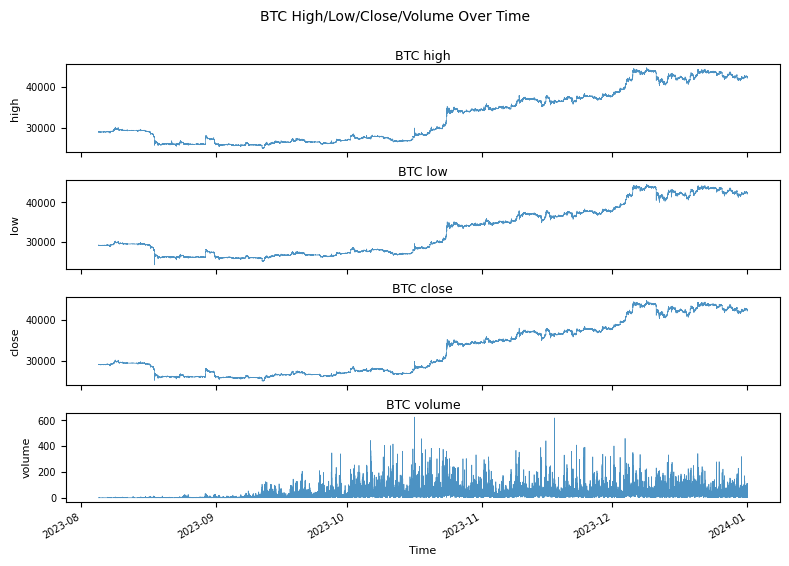

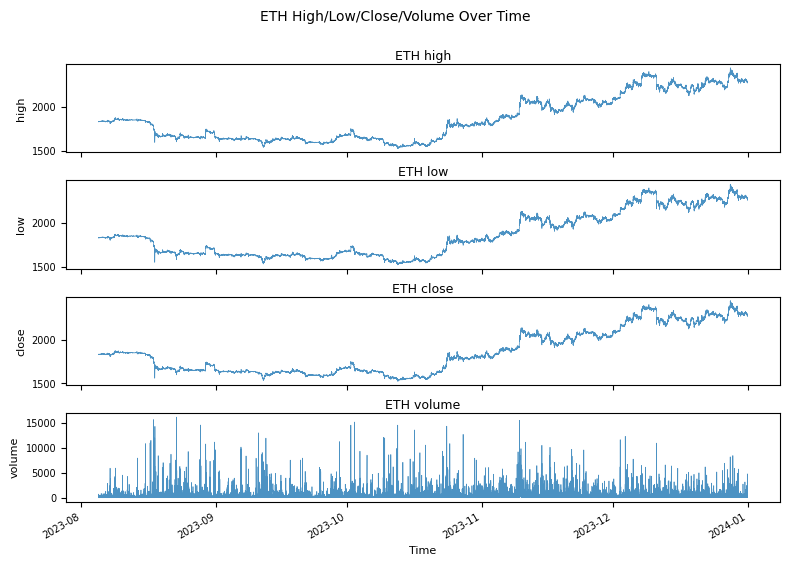

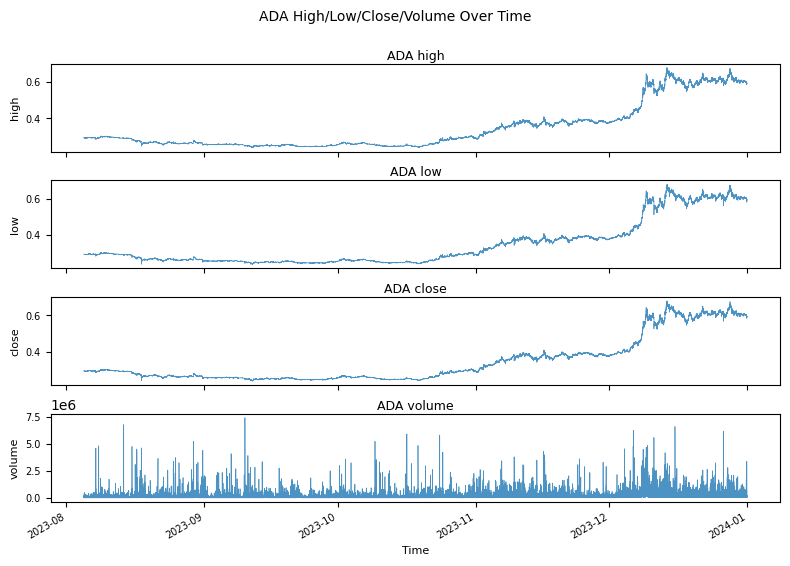

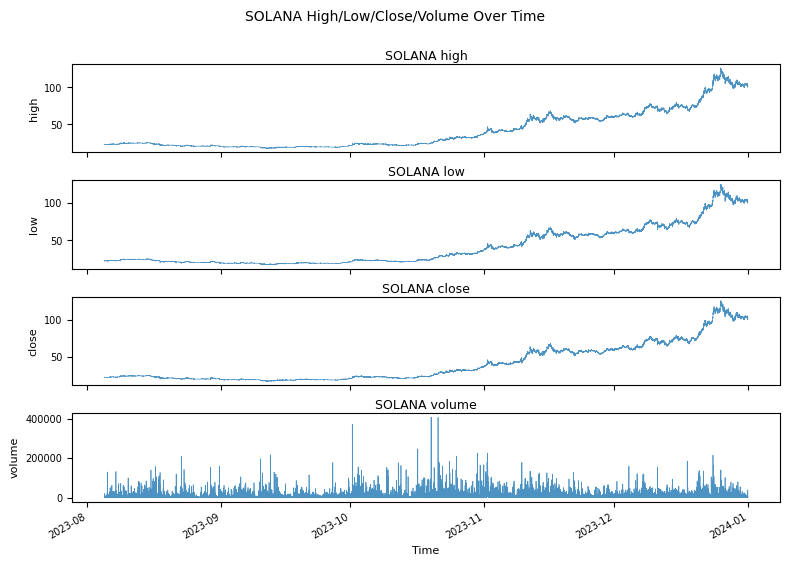

In [5]:
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path

COINS = ["btc", "eth", "ada", "solana"]
DATA_DIR = Path("/Users/jadenfix/Downloads")

for coin in COINS:
    df = pl.read_csv(DATA_DIR / f"training_data_{coin}.csv")
    # Combine date and time into a true datetime
    df = df.with_columns([
        (
            (pl.col("date_only").cast(pl.Utf8) + " " + pl.col("time_only"))
            .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S", strict=False)
            .alias("timestamp")
        )
    ])
    ts     = df["timestamp"].to_numpy()
    high   = df["high"].to_numpy()
    low    = df["low"].to_numpy()
    close  = df["close"].to_numpy()
    volume = df["volume"].to_numpy()

    fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
    for ax, feature, values in zip(
        axes, ["high", "low", "close", "volume"], [high, low, close, volume]
    ):
        ax.plot(ts, values, lw=0.5, alpha=0.8)
        ax.set_ylabel(feature, fontsize=8)
        ax.tick_params(labelsize=7)
        ax.set_title(f"{coin.upper()} {feature}", fontsize=9, pad=3)
        # Highlight NaNs if present
        if pl.Series(values).is_null().any():
            nan_mask = pl.Series(values).is_null().to_numpy()
            ax.scatter(ts[nan_mask], [0]*nan_mask.sum(), color="red", s=8, label="NaN")
    plt.tight_layout()
    plt.xlabel("Time", fontsize=8)
    fig.autofmt_xdate()
    plt.suptitle(f"{coin.upper()} High/Low/Close/Volume Over Time", fontsize=10, y=1.02)
    plt.subplots_adjust(top=0.93)
    plt.show()

## Short ML datasets eth btc sol ada

['timestamp',
 'btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume',
 'btc_close_lag1', 'btc_close_lag2', 'btc_close_lag3',
 'eth_open', 'eth_high', 'eth_low', 'eth_close', 'eth_volume',
 'eth_close_lag1', 'eth_close_lag2', 'eth_close_lag3',
 'ada_open', 'ada_high', 'ada_low', 'ada_close', 'ada_volume',
 'ada_close_lag1', 'ada_close_lag2', 'ada_close_lag3',
 'solana_open', 'solana_high', 'solana_low', 'solana_close', 'solana_volume',
 'solana_close_lag1', 'solana_close_lag2', 'solana_close_lag3',
 'target_next_close_{coin}']

In [6]:
import polars as pl
from pathlib import Path

DATA_DIR = Path("/Users/jadenfix/Downloads")
COINS = ["btc", "eth", "ada", "solana"]

# Load, add timestamp, and keep only timestamp + features (with coin prefix)
dfs = {}
for coin in COINS:
    df = pl.read_csv(DATA_DIR / f"training_data_{coin}.csv")
    df = df.with_columns([
        (pl.col("date_only").cast(pl.Utf8) + " " + pl.col("time_only"))
            .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S", strict=False)
            .alias("timestamp")
    ])
    # Rename feature columns to be coin-specific, except timestamp
    feature_cols = [c for c in df.columns if c not in {"date_only", "time_only", "timestamp"}]
    rename_map = {c: f"{coin}_{c}" for c in feature_cols}
    df = df.rename(rename_map)
    # Keep only timestamp and renamed features (drop extra date/time cols)
    keep_cols = ["timestamp"] + [f"{coin}_{c}" for c in feature_cols]
    dfs[coin] = df.select(keep_cols)

# Start with BTC as the "left" base frame, join in the other coins (ETH, ADA, SOLANA)
joint = dfs["btc"]
for coin in ["eth", "ada", "solana"]:
    joint = joint.join(dfs[coin], on="timestamp", how="inner")

# Add next-close targets for each coin
for coin in COINS:
    joint = joint.with_columns(
        pl.col(f"{coin}_close").shift(-1).alias(f"target_next_close_{coin}")
    )

# Add autoregressive features (N lags) for closes
N_LAGS = 3
for coin in COINS:
    for lag in range(1, N_LAGS+1):
        joint = joint.with_columns(
            pl.col(f"{coin}_close").shift(lag).alias(f"{coin}_close_lag{lag}")
        )

# For each coin, create an ML dataset: all features, and target is "next close" for that coin
for coin in COINS:
    target_col = f"target_next_close_{coin}"
    # All columns except other targets; put our target last for convenience
    cols = [
        c for c in joint.columns if not (
            c.startswith("target_next_close_") and c != target_col
        )
    ]
    if target_col not in cols:
        cols.append(target_col)
    df_ml = joint.select(cols).drop_nulls([target_col])
    df_ml.write_csv(DATA_DIR / f"ml_training_{coin}.csv")
    print(f"ML-ready dataset for {coin.upper()} written: {df_ml.shape[0]} rows, {df_ml.shape[1]} columns")

ML-ready dataset for BTC written: 214559 rows, 34 columns
ML-ready dataset for ETH written: 214559 rows, 34 columns
ML-ready dataset for ADA written: 214559 rows, 34 columns
ML-ready dataset for SOLANA written: 214559 rows, 34 columns


## Long ETH SOL ADA Dataset
timestamp,
eth_open, eth_high, eth_low, eth_close, eth_volume, eth_close_lag1, eth_close_lag2, eth_close_lag3,
ada_open, ada_high, ada_low, ada_close, ada_volume, ada_close_lag1, ada_close_lag2, ada_close_lag3,
solana_open, solana_high, solana_low, solana_close, solana_volume, solana_close_lag1, solana_close_lag2, solana_close_lag3,
target_next_close_{coin}


In [7]:
import polars as pl
from pathlib import Path

DATA_DIR = Path("/Users/jadenfix/Downloads")
COINS = ["eth", "ada", "solana"]
N_LAGS = 3

# Step 1: Load, timestamp, and coin-prefix feature columns
dfs = {}
for coin in COINS:
    df = pl.read_csv(DATA_DIR / f"training_data_long_{coin}.csv")
    df = df.with_columns([
        (pl.col("date_only").cast(pl.Utf8) + " " + pl.col("time_only"))
            .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S", strict=False)
            .alias("timestamp")
    ])
    feature_cols = [c for c in df.columns if c not in {"date_only", "time_only", "timestamp"}]
    rename_map = {c: f"{coin}_{c}" for c in feature_cols}
    df = df.rename(rename_map)
    keep_cols = ["timestamp"] + [f"{coin}_{c}" for c in feature_cols]
    dfs[coin] = df.select(keep_cols)

# Step 2: Inner join on timestamp (keep fully-aligned times only)
joint = dfs["eth"]
for coin in ["ada", "solana"]:
    joint = joint.join(dfs[coin], on="timestamp", how="inner")

# Step 3: Add target and autoregressive lags for each coin
for coin in COINS:
    joint = joint.with_columns(
        pl.col(f"{coin}_close").shift(-1).alias(f"target_next_close_{coin}")
    )

for coin in COINS:
    for lag in range(1, N_LAGS + 1):
        joint = joint.with_columns(
            pl.col(f"{coin}_close").shift(lag).alias(f"{coin}_close_lag{lag}")
        )

# Step 4: For each coin, build a dataset with all features and its own target
for coin in COINS:
    target_col = f"target_next_close_{coin}"
    cols = [
        c for c in joint.columns if not (
            c.startswith("target_next_close_") and c != target_col
        )
    ]
    if target_col not in cols:
        cols.append(target_col)
    df_ml = joint.select(cols).drop_nulls([target_col])
    out_path = DATA_DIR / f"ml_training_long_{coin}.csv"
    df_ml.write_csv(out_path)
    print(f"ML-ready LONG dataset for {coin.upper()} written: {df_ml.shape[0]} rows, {df_ml.shape[1]} columns")

ML-ready LONG dataset for ETH written: 1779855 rows, 26 columns
ML-ready LONG dataset for ADA written: 1779855 rows, 26 columns
ML-ready LONG dataset for SOLANA written: 1779855 rows, 26 columns


## to make it so it has date_only and time_only


In [10]:
import polars as pl
from pathlib import Path

files = [
    ("ml_training_btc.csv",       "learning_data_btc.csv"),
    ("ml_training_eth.csv",       "learning_data_eth.csv"),
    ("ml_training_ada.csv",       "learning_data_ada.csv"),
    ("ml_training_solana.csv",    "learning_data_solana.csv"),
    ("ml_training_long_eth.csv",  "learning_data_long_eth.csv"),
    ("ml_training_long_ada.csv",  "learning_data_long_ada.csv"),
    ("ml_training_long_solana.csv","learning_data_long_solana.csv"),
]

DATA_DIR = Path("/Users/jadenfix/Downloads")

for in_file, out_file in files:
    df = pl.read_csv(DATA_DIR/in_file)
    # Remove date_only/time_only/timestamp if present
    for col in ["date_only", "time_only", "timestamp"]:
        if col in df.columns:
            df = df.drop(col)
    # Only create date_only and time_only if timestamp was present and dropped
    if "timestamp" in df.columns:
        # (never runs now, since already dropped)
        df = df.with_columns([
            pl.col("timestamp").str.slice(0, 10).alias("date_only"),
            pl.col("timestamp").str.slice(11, 8).alias("time_only"),
        ])
        df = df.drop("timestamp")
    else:
        # Check if the original file had a timestamp column in the first place
        df_test = pl.read_csv(DATA_DIR/in_file, n_rows=1)
        if "timestamp" in df_test.columns:
            # Re-load with timestamp, create splits, drop timestamp, then select cols from df
            df_full = pl.read_csv(DATA_DIR/in_file)
            df_full = df_full.with_columns([
                pl.col("timestamp").str.slice(0, 10).alias("date_only"),
                pl.col("timestamp").str.slice(11, 8).alias("time_only"),
            ])
            df_full = df_full.drop("timestamp")
            # reorder: features, then date_only/time_only at end
            base_cols = [c for c in df_full.columns if c not in ("date_only", "time_only")]
            extra_cols = [c for c in ["date_only", "time_only"] if c in df_full.columns]
            df_full = df_full.select(base_cols + extra_cols)
            df_full.write_csv(DATA_DIR/out_file)
            print(f"Wrote {out_file} with split date/time from timestamp")
            continue
    # If already split, just reorder to put date_only/time_only at end if present
    base_cols = [c for c in df.columns if c not in ("date_only", "time_only")]
    extra_cols = [c for c in ["date_only", "time_only"] if c in df.columns]
    df = df.select(base_cols + extra_cols)
    df.write_csv(DATA_DIR/out_file)
    print(f"Wrote {out_file} (already split or no timestamp found)")

Wrote learning_data_btc.csv with split date/time from timestamp
Wrote learning_data_eth.csv with split date/time from timestamp
Wrote learning_data_ada.csv with split date/time from timestamp
Wrote learning_data_solana.csv with split date/time from timestamp
Wrote learning_data_long_eth.csv with split date/time from timestamp
Wrote learning_data_long_ada.csv with split date/time from timestamp
Wrote learning_data_long_solana.csv with split date/time from timestamp


## Plots

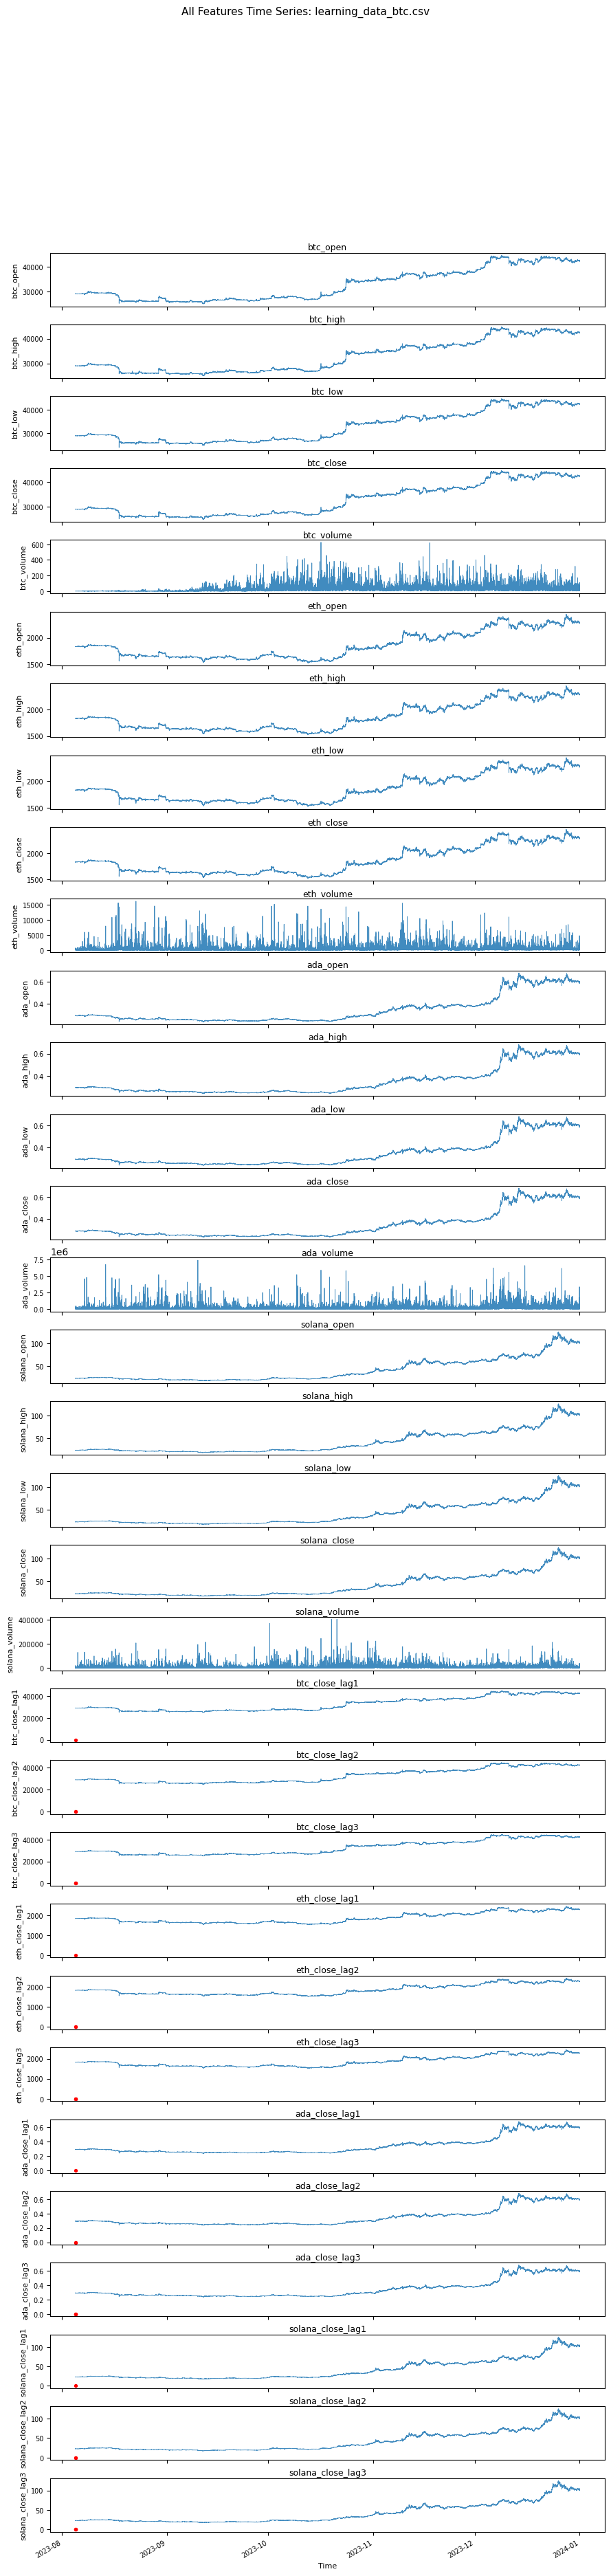

In [11]:
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("/Users/jadenfix/Downloads")
file = "learning_data_btc.csv"  # Change for each coin

# Load and make a timestamp column
df = pl.read_csv(DATA_DIR / file)
df = df.with_columns(
    (
        pl.col("date_only") + " " + pl.col("time_only")
    ).str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S", strict=False).alias("timestamp")
)

# Exclude non-numeric and non-feature columns
exclude = {"date_only", "time_only", "timestamp"}
target_cols = [c for c in df.columns if c.startswith("target_next_close_")]
plot_cols = [
    c for c in df.columns
    if c not in exclude and c not in target_cols and df[c].dtype in [pl.Float64, pl.Float32, pl.Int64, pl.Int32]
]

# Prepare data
ts = df["timestamp"].to_numpy()
num_plots = len(plot_cols)
fig, axes = plt.subplots(num_plots, 1, figsize=(9, max(2, num_plots*1.4)), sharex=True)

if num_plots == 1:
    axes = [axes]

for i, col in enumerate(plot_cols):
    axes[i].plot(ts, df[col].to_numpy(), lw=0.6, alpha=0.85)
    axes[i].set_ylabel(col, fontsize=8)
    axes[i].tick_params(labelsize=7)
    axes[i].set_title(f"{col}", fontsize=9, pad=3)
    if pl.Series(df[col]).is_null().any():
        nan_mask = pl.Series(df[col]).is_null().to_numpy()
        axes[i].scatter(ts[nan_mask], [0]*nan_mask.sum(), color="red", s=8, label="NaN")

plt.tight_layout()
plt.xlabel("Time", fontsize=8)
fig.autofmt_xdate()
plt.suptitle(f"All Features Time Series: {file}", fontsize=11, y=1.02)
plt.subplots_adjust(top=0.94)
plt.show()

## Plots for all features

Plotting features for learning_data_btc.csv...


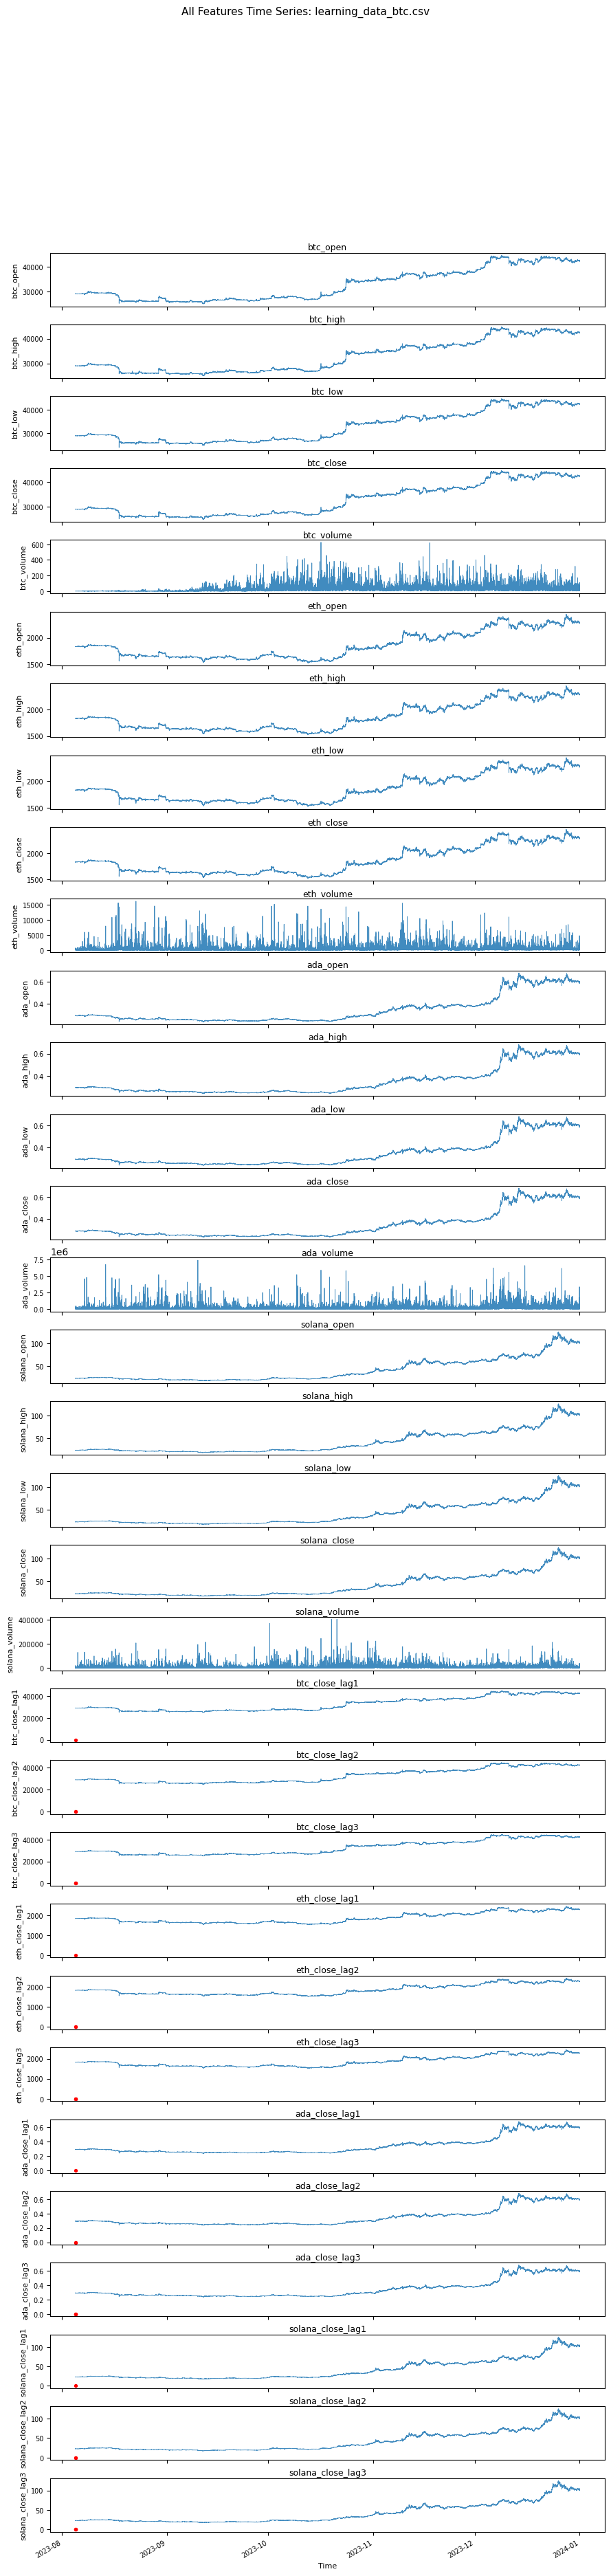

Plotting features for learning_data_eth.csv...


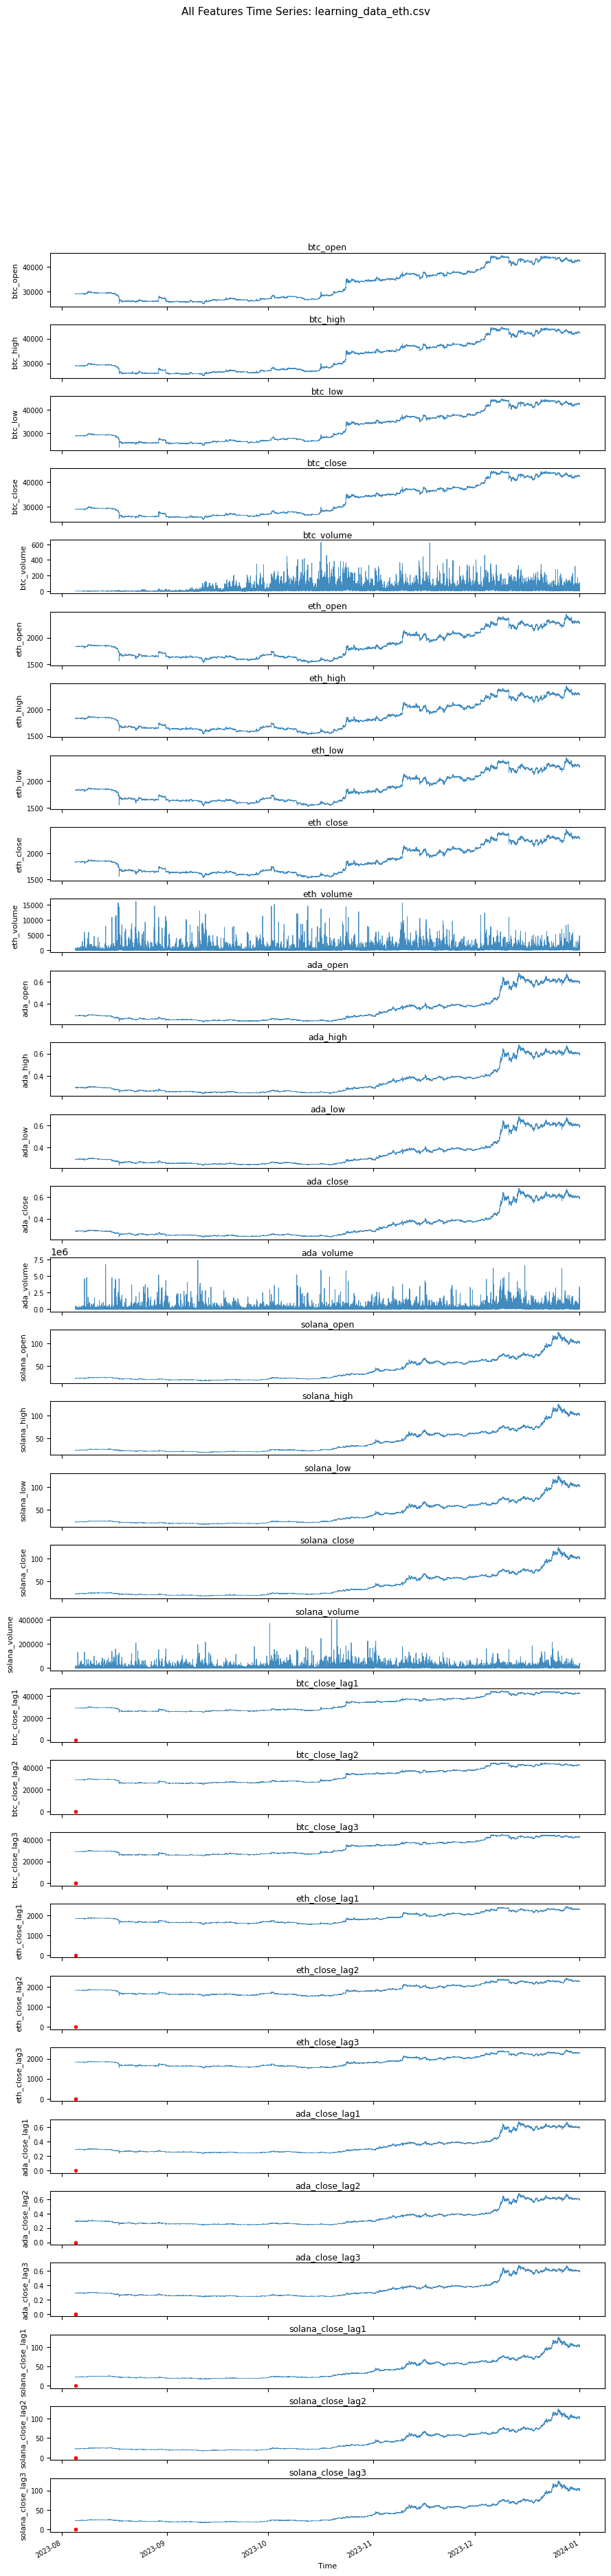

Plotting features for learning_data_ada.csv...


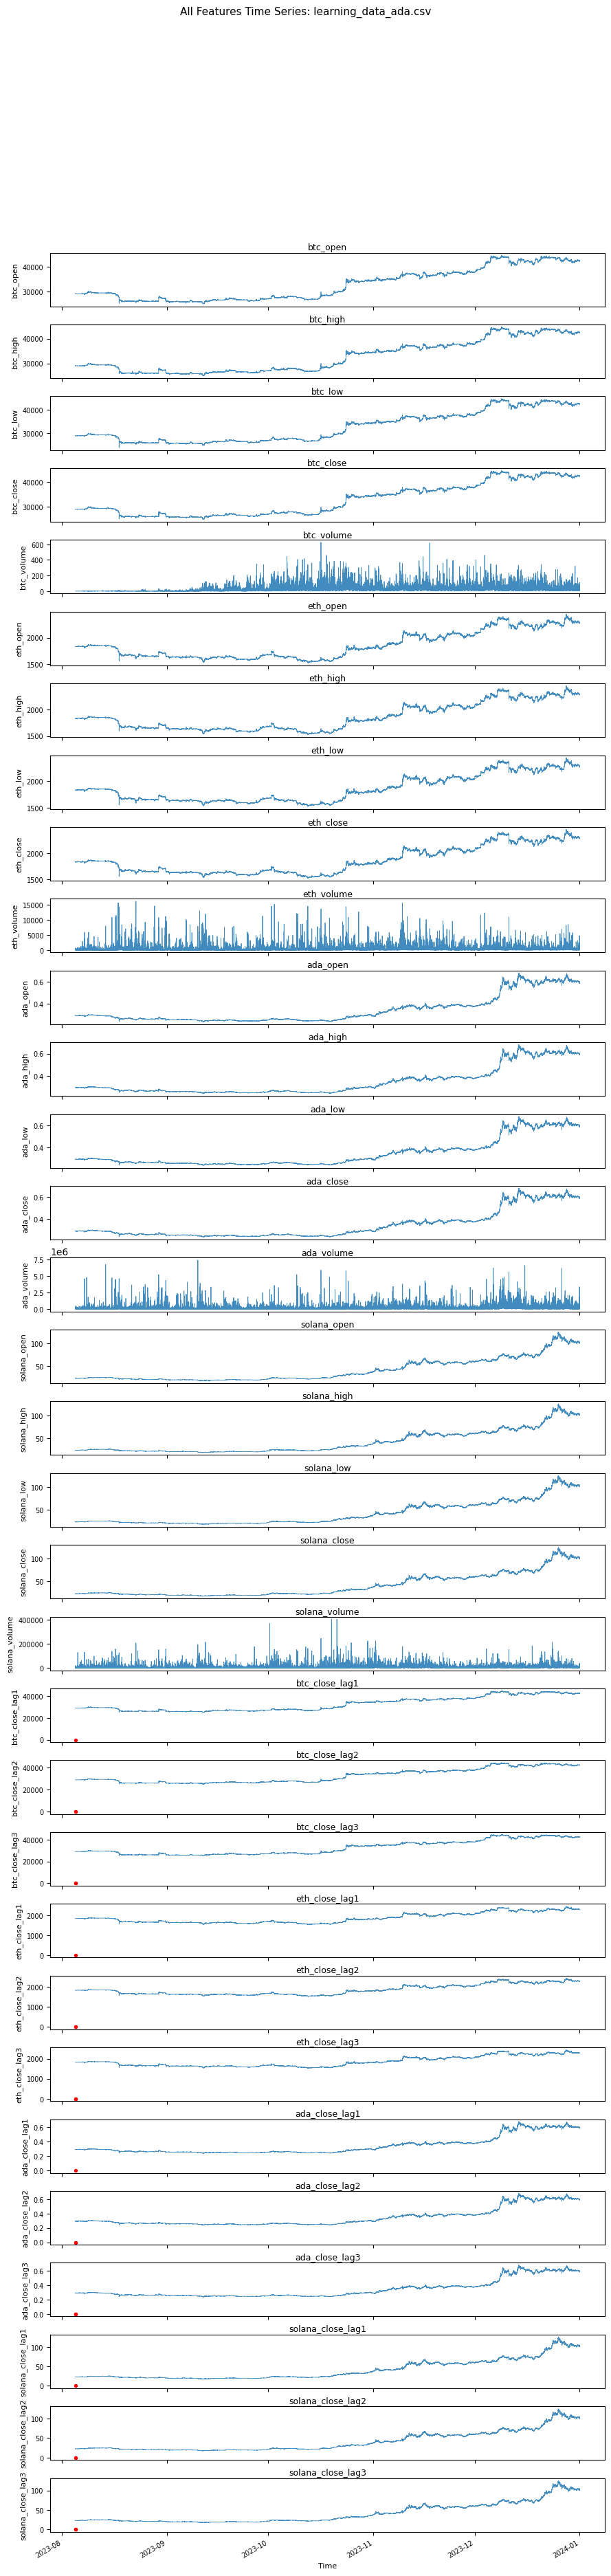

Plotting features for learning_data_solana.csv...


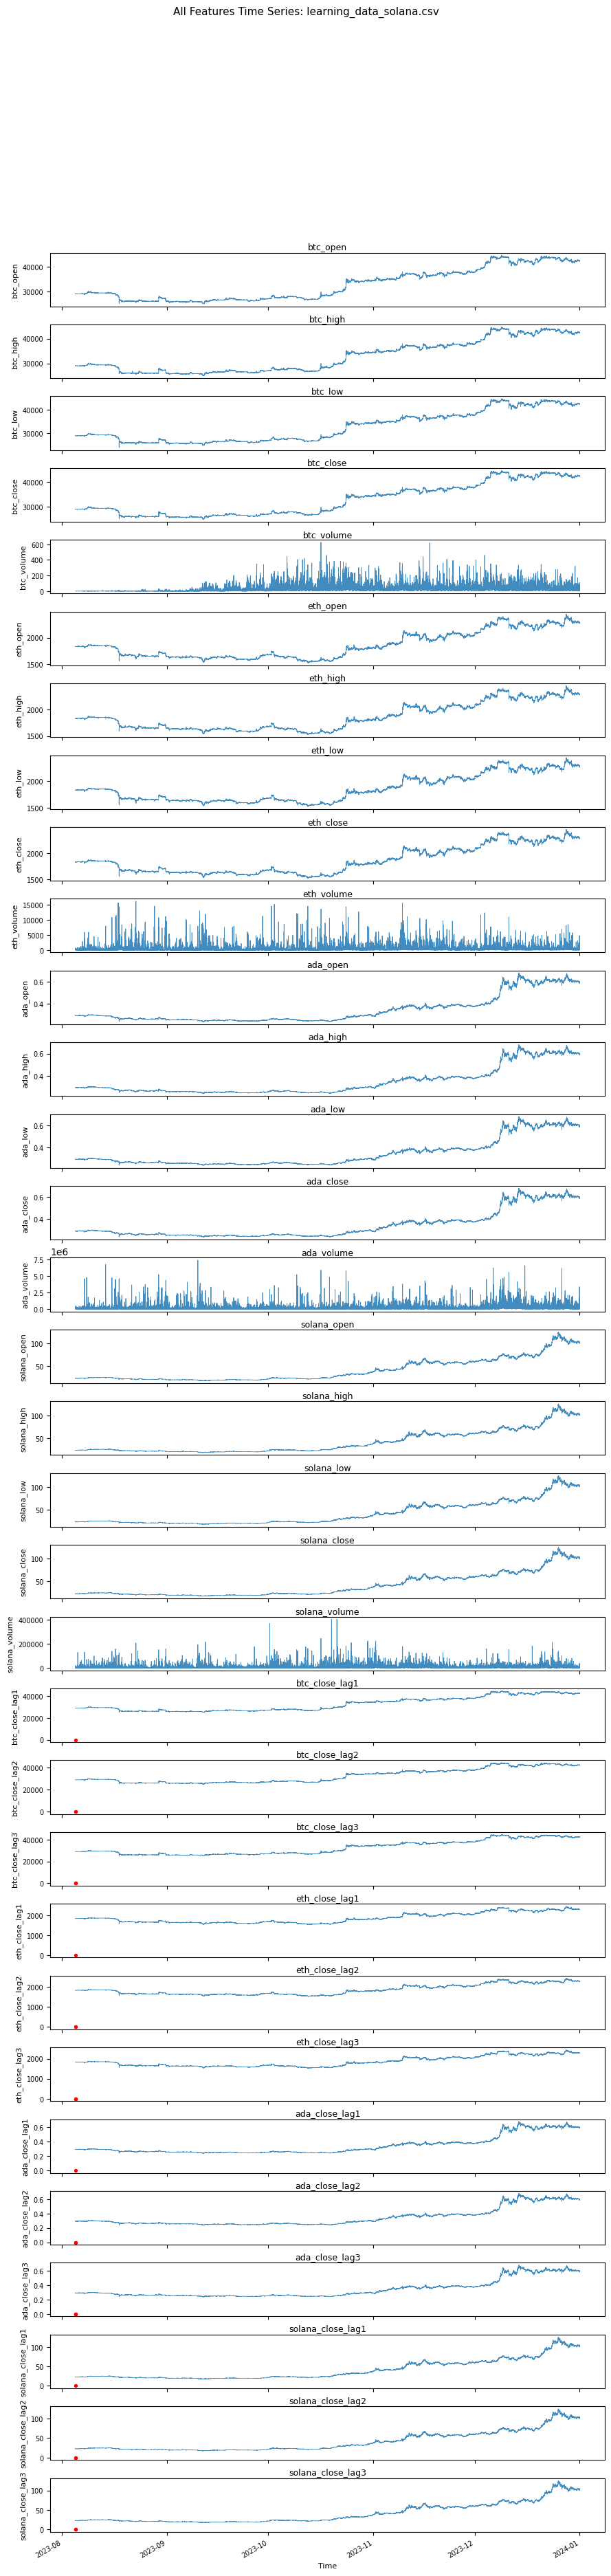

Plotting features for learning_data_long_eth.csv...


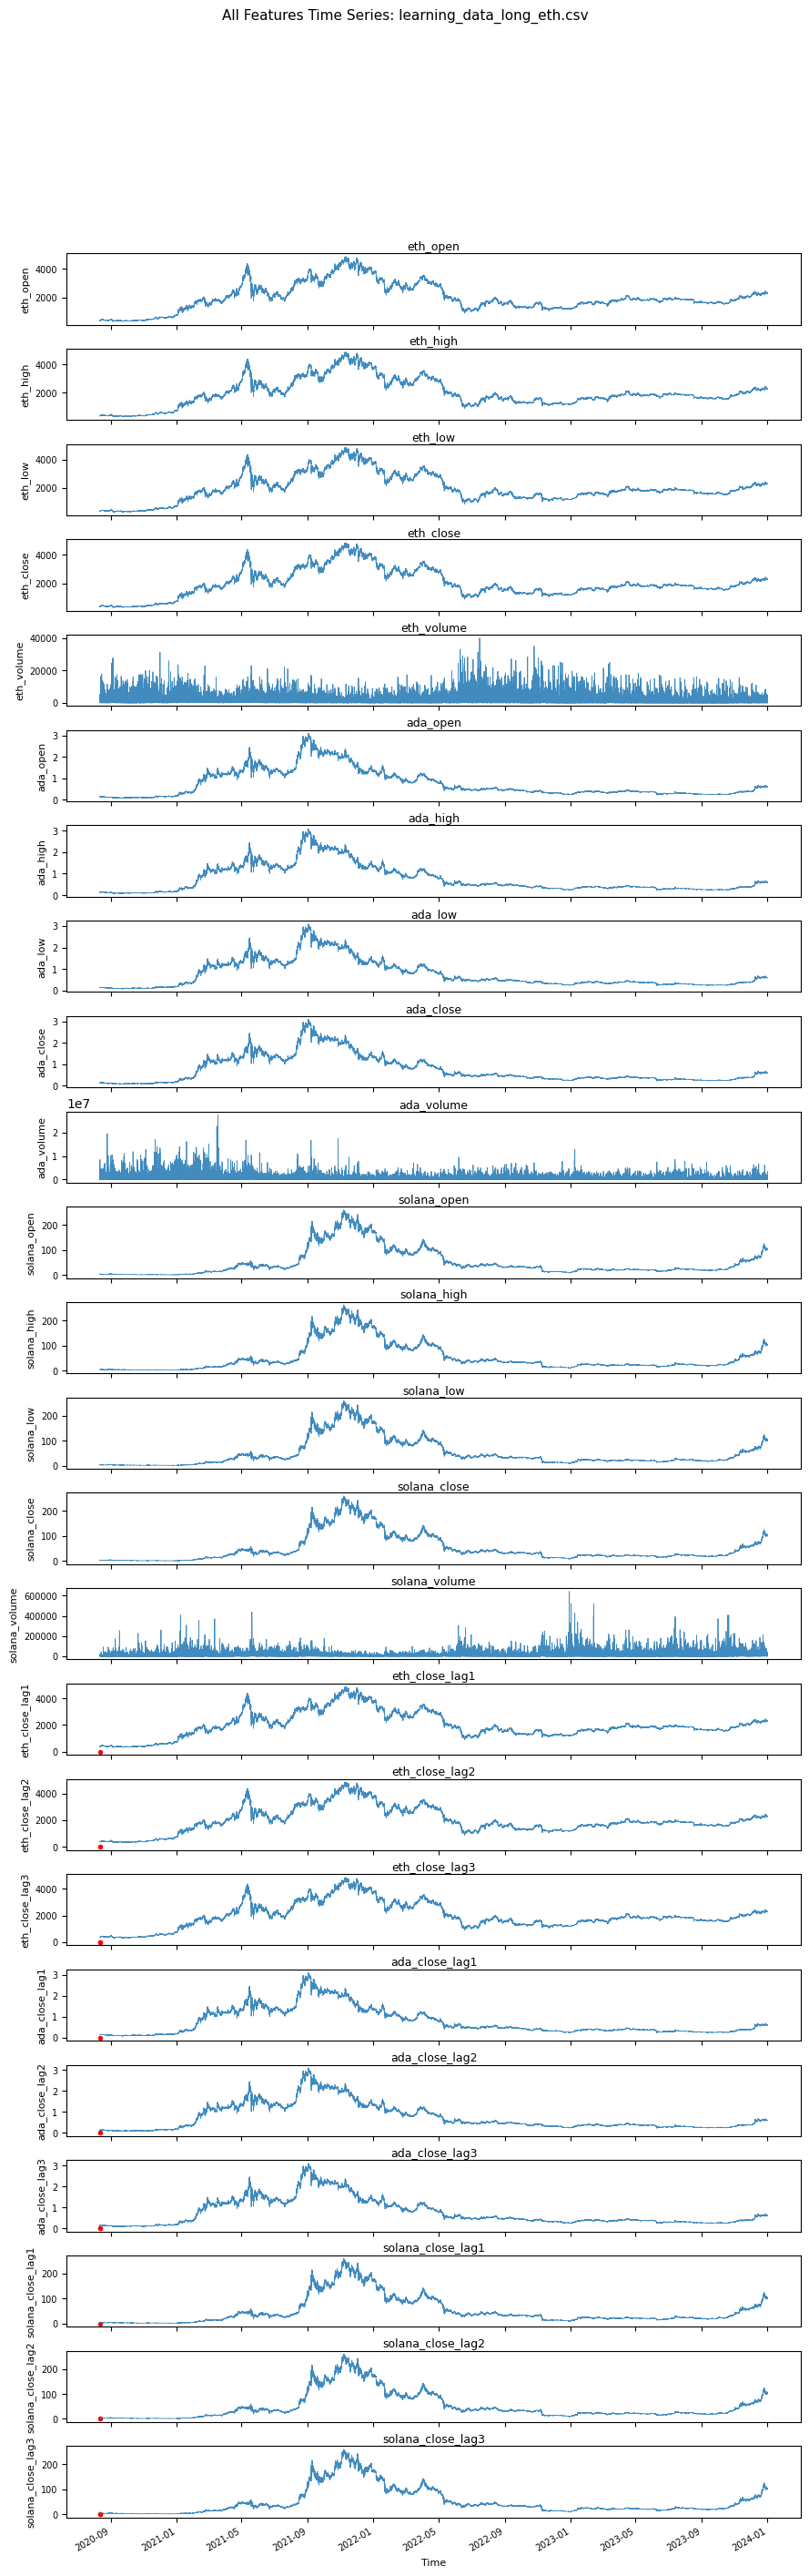

Plotting features for learning_data_long_ada.csv...


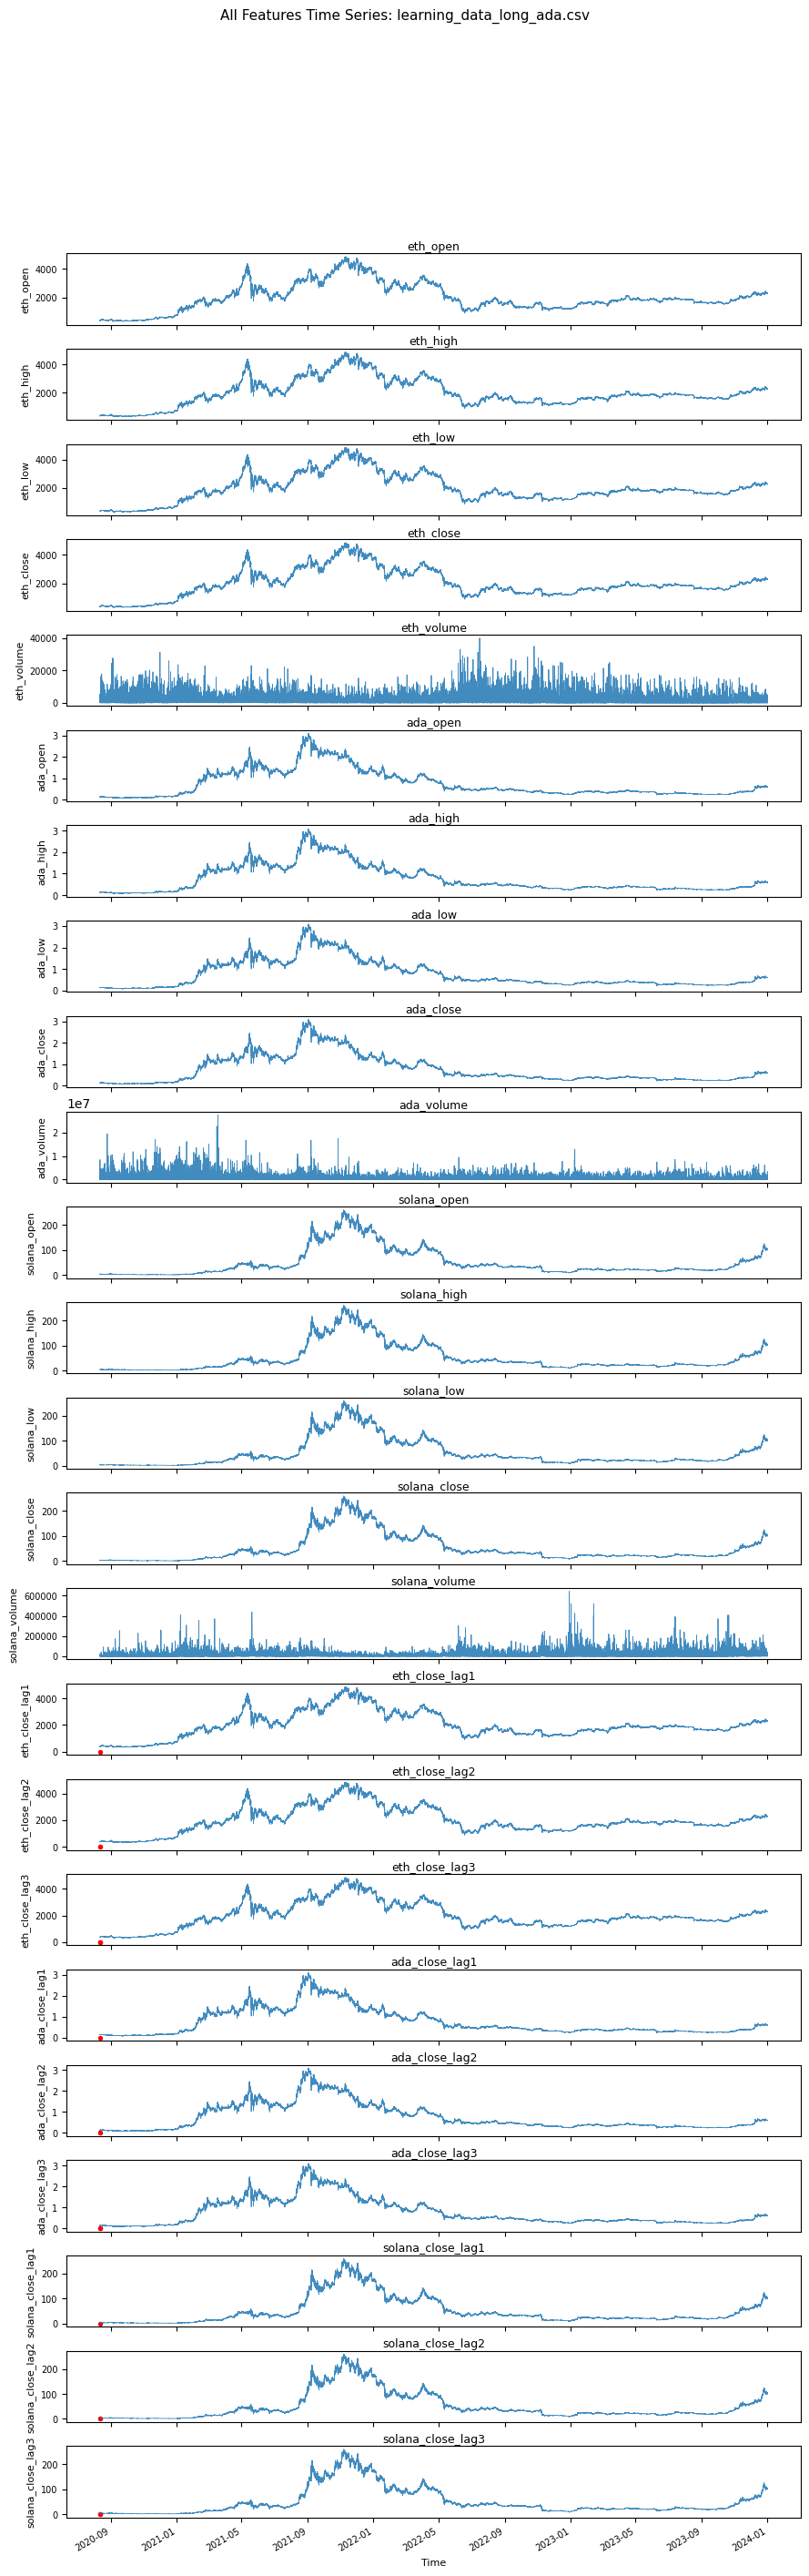

Plotting features for learning_data_long_solana.csv...


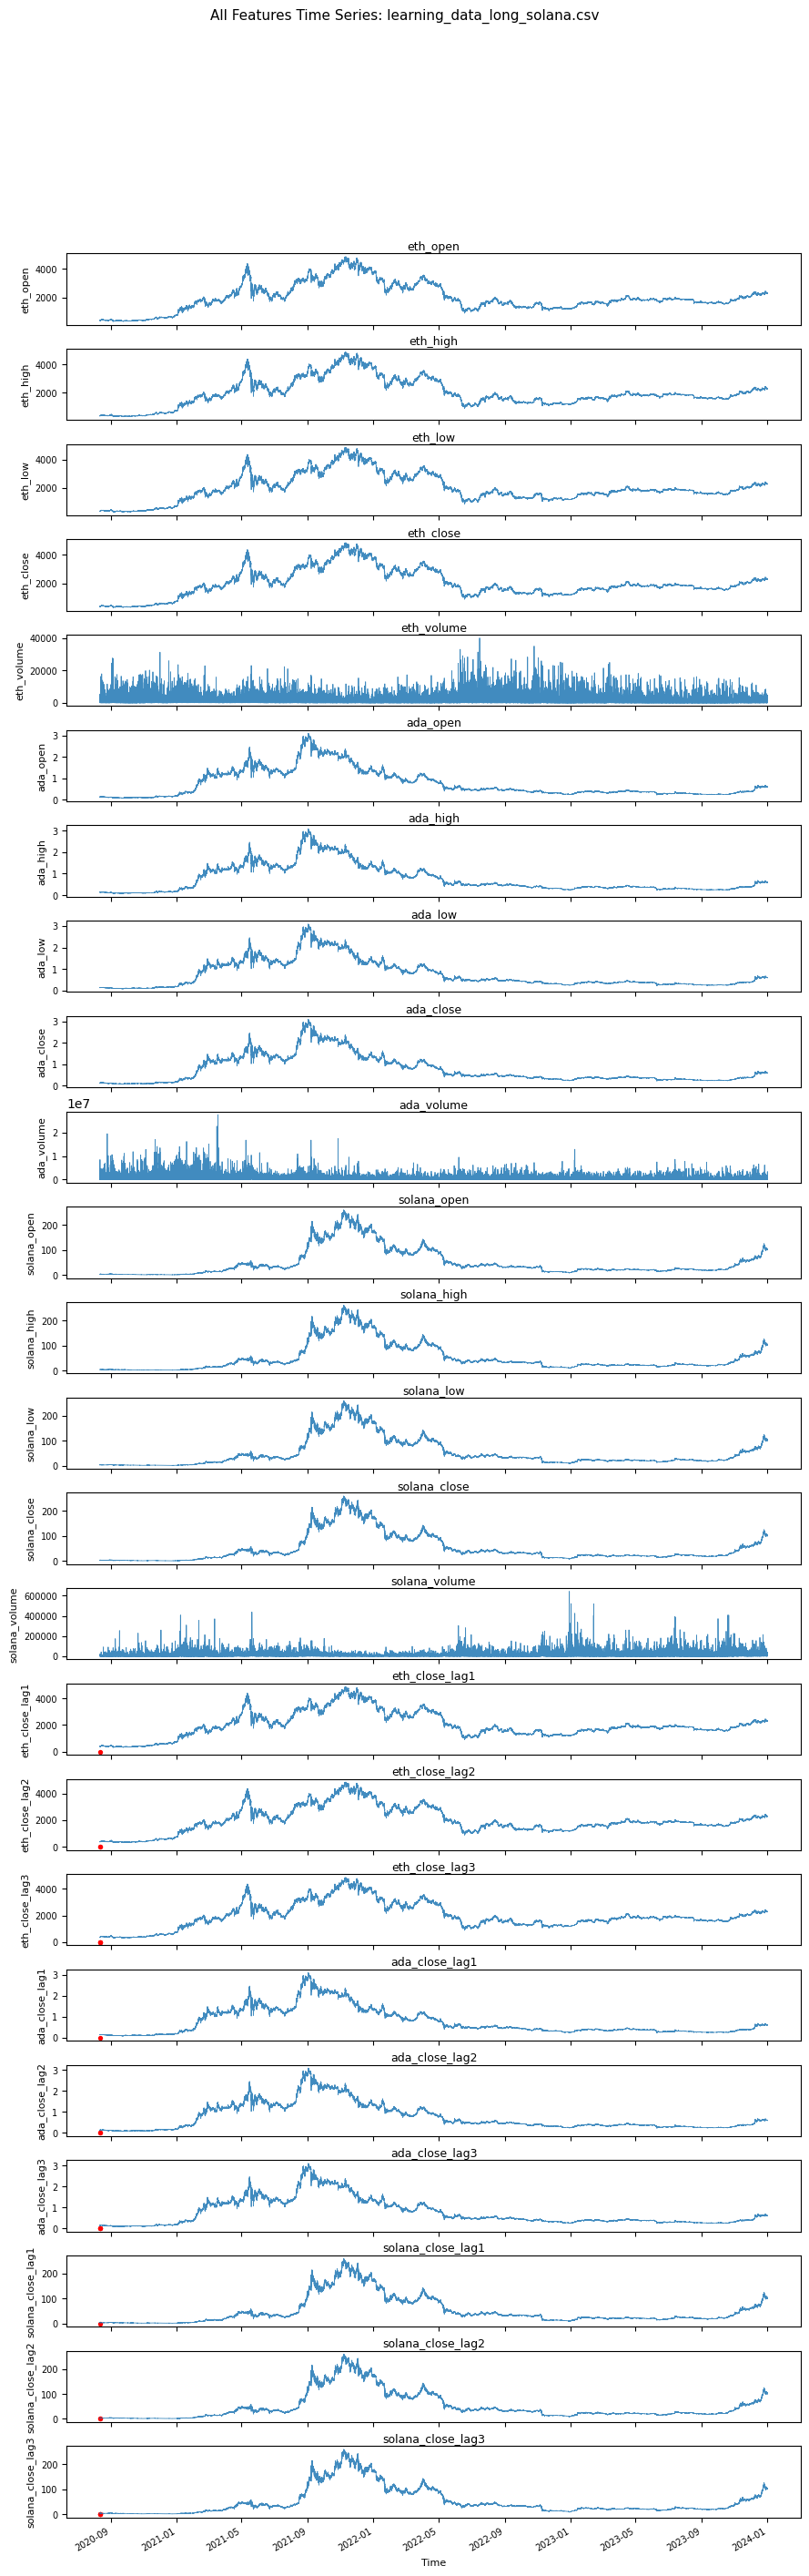

In [12]:
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("/Users/jadenfix/Downloads")
files = [
    "learning_data_btc.csv",
    "learning_data_eth.csv",
    "learning_data_ada.csv",
    "learning_data_solana.csv",
    "learning_data_long_eth.csv",
    "learning_data_long_ada.csv",
    "learning_data_long_solana.csv",
]

for file in files:
    print(f"Plotting features for {file}...")
    df = pl.read_csv(DATA_DIR / file)
    # Compose timestamp from date_only and time_only
    df = df.with_columns(
        (
            pl.col("date_only") + " " + pl.col("time_only")
        ).str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S", strict=False).alias("timestamp")
    )
    exclude = {"date_only", "time_only", "timestamp"}
    target_cols = [c for c in df.columns if c.startswith("target_next_close_")]
    # Only numeric columns (for features)
    plot_cols = [
        c for c in df.columns
        if c not in exclude and c not in target_cols and df[c].dtype in [pl.Float64, pl.Float32, pl.Int64, pl.Int32]
    ]
    ts = df["timestamp"].to_numpy()
    num_plots = len(plot_cols)
    fig, axes = plt.subplots(num_plots, 1, figsize=(9, max(2, num_plots*1.4)), sharex=True)
    if num_plots == 1:
        axes = [axes]
    for i, col in enumerate(plot_cols):
        axes[i].plot(ts, df[col].to_numpy(), lw=0.6, alpha=0.85)
        axes[i].set_ylabel(col, fontsize=8)
        axes[i].tick_params(labelsize=7)
        axes[i].set_title(f"{col}", fontsize=9, pad=3)
        # Mark NaNs (if any)
        if pl.Series(df[col]).is_null().any():
            nan_mask = pl.Series(df[col]).is_null().to_numpy()
            axes[i].scatter(ts[nan_mask], [0]*nan_mask.sum(), color="red", s=8, label="NaN")
    plt.tight_layout()
    plt.xlabel("Time", fontsize=8)
    fig.autofmt_xdate()
    plt.suptitle(f"All Features Time Series: {file}", fontsize=11, y=1.02)
    plt.subplots_adjust(top=0.94)
    plt.show()

## Preprocessed data: 

# Processed Data Feature Engineering

Below is the complete mathematical specification for every engineered column in the `processed_data_{coin}.csv` pipeline.

---

## 1. Notation & Raw Inputs

Let observations be indexed by integer time $t$ (e.g. minutes). For each coin:

- $T_t$: **timestamp** at index $t$
- $O_t, H_t, L_t, C_t, V_t$: raw **open**, **high**, **low**, **close**, **volume** at time $t$

---

## 2. Log-Price

$$
\ell_t = \log(C_t)
$$

where $\log$ is the natural logarithm.

---

## 3. Log-Return

$$
r_t = \ell_t - \ell_{t-1} = \log(C_t) - \log(C_{t-1})
$$

This stationary series replaces raw prices in many ML models.

---

## 4. Next-Period Return (Target)

$$
r_{t}^{\text{next}} = r_{t+1}
$$

This is your **supervised learning target**.

---

## 5. Winsorized Return

Compute the empirical 1st and 99th percentiles of $\{r_t\}$, call them $q_{0.01}$ and $q_{0.99}$. Then

$$
r_t^{(w)} =
\begin{cases}
q_{0.01}, & r_t < q_{0.01},\\
r_t,      & q_{0.01} \le r_t \le q_{0.99},\\
q_{0.99}, & r_t > q_{0.99}.
\end{cases}
$$

This caps extreme outliers without dropping data.

---

## 6. Rolling-Window Features

Define a generic window length $N$. Then for each $t$:

1. **Rolling Mean (Momentum):**
   $$
   \mu_t^{(N)} = \frac{1}{N} \sum_{i=t-N+1}^{t} r_i^{(w)}
   $$

2. **Rolling Std (Volatility):**
   $$
   \sigma_t^{(N)} = \sqrt{\frac{1}{N-1} \sum_{i=t-N+1}^{t} \left(r_i^{(w)} - \mu_t^{(N)}\right)^2}
   $$

We use two windows:

- **Hourly** ($N=60$ minutes):
  $$
  r^{\text{ma1h}}_t = \mu_t^{(60)},\quad
  r^{\text{vol1h}}_t = \sigma_t^{(60)}
  $$
- **Daily** ($N=1440$ minutes):
  $$
  r^{\text{ma1d}}_t = \mu_t^{(1440)},\quad
  r^{\text{vol1d}}_t = \sigma_t^{(1440)}
  $$

---

## 7. Final Column List

For each coin (e.g. BTC), the processed CSV has:

1. **`timestamp`**
2. **Raw OHLCV:** $O_t, H_t, L_t, C_t, V_t$
3. **Stationary transforms:**
   - $\ell_t$ (`coin_log`)
   - $r_t$ (`coin_r`)
   - $r_t^{(w)}$ (`coin_r_winsor`)
4. **Target:**
   - $r_{t+1}$ (`coin_r_next`)
5. **Rolling features:**
   - `coin_r_ma1h`, `coin_r_vol1h` (1h)
   - `coin_r_ma1d`, `coin_r_vol1d` (1d)

---

### Example: Column Order for BTC

*(Same pattern for ETH, ADA, SOLANA in each file.)*

---

## 8. Data Cleaning Steps

- **Sort & dedupe:** ensure strictly increasing $t$
- **Drop nulls:** remove any rows where $r_{t+1}$ (the target) is undefined
- **No further normalization**—all features on comparable scales via log-transform or winsorization

---

This specification ensures your datasets fully adhere to the standard assumptions of time-series ML: stationarity, bounded outliers, and rich temporal features.

In [20]:
import polars as pl
import numpy as np
from pathlib import Path

DATA_DIR = Path("/Users/jadenfix/Downloads")

files_short = {
    "btc":    "learning_data_btc.csv",
    "eth":    "learning_data_eth.csv",
    "ada":    "learning_data_ada.csv",
    "solana": "learning_data_solana.csv",
}
files_long = {
    "eth":    "learning_data_long_eth.csv",
    "ada":    "learning_data_long_ada.csv",
    "solana": "learning_data_long_solana.csv",
}

HOUR = 60
DAY  = 1440

def process(coin: str, fname: str, out_stem: str):
    df = pl.read_csv(DATA_DIR / fname)
    # 1) Build timestamp and drop date_only/time_only
    df = df.with_columns([
        (pl.col("date_only") + " " + pl.col("time_only"))
            .str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S")
            .alias("timestamp")
    ]).drop(["date_only", "time_only"])
    # 2) Sort & dedupe
    df = df.sort("timestamp").unique(subset="timestamp")
    # 3) Log-price & log-return
    close = df[f"{coin}_close"]
    df = df.with_columns([
        np.log(close).alias(f"{coin}_log"),
        (np.log(close) - np.log(close).shift(1)).alias(f"{coin}_r"),
    ])
    # 4) Next-period return = target
    df = df.with_columns([
        pl.col(f"{coin}_r").shift(-1).alias(f"{coin}_r_next")
    ])
    # 5) Winsorize returns at 1st/99th percentile
    rtn = df[f"{coin}_r"]
    lo, hi = float(rtn.quantile(0.01)), float(rtn.quantile(0.99))
    df = df.with_columns([
        pl.col(f"{coin}_r").clip(lo, hi).alias(f"{coin}_r_winsor")
    ])
    # 6) Rolling features on winsorized return
    df = df.with_columns([
        pl.col(f"{coin}_r_winsor").rolling_mean(window_size=HOUR, min_periods=1).alias(f"{coin}_r_ma1h"),
        pl.col(f"{coin}_r_winsor").rolling_std(window_size=HOUR, min_periods=1).alias(f"{coin}_r_vol1h"),
        pl.col(f"{coin}_r_winsor").rolling_mean(window_size=DAY, min_periods=1).alias(f"{coin}_r_ma1d"),
        pl.col(f"{coin}_r_winsor").rolling_std(window_size=DAY, min_periods=1).alias(f"{coin}_r_vol1d"),
    ])
    # 7) Drop ALL rows with any nulls
    df = df.drop_nulls()
    # 8) Write out
    out_path = DATA_DIR / f"processed_data_{out_stem}.csv"
    df.write_csv(out_path)
    print(f"Wrote {out_path.name}: {df.shape[0]} rows × {df.shape[1]} cols (nulls removed)")

# Process all short coins
for coin, fname in files_short.items():
    process(coin, fname, coin)

# Process all long coins
for coin, fname in files_long.items():
    process(coin, fname, f"{coin}_long")

/var/folders/lk/4ym49gg94jz0bf7w8jnp_wnh0000gp/T/ipykernel_71954/881640022.py:50: DeprecationWarning: The argument `min_periods` for `Expr.rolling_mean` is deprecated. It has been renamed to `min_samples`.
  pl.col(f"{coin}_r_winsor").rolling_mean(window_size=HOUR, min_periods=1).alias(f"{coin}_r_ma1h"),
/var/folders/lk/4ym49gg94jz0bf7w8jnp_wnh0000gp/T/ipykernel_71954/881640022.py:51: DeprecationWarning: The argument `min_periods` for `Expr.rolling_std` is deprecated. It has been renamed to `min_samples`.
  pl.col(f"{coin}_r_winsor").rolling_std(window_size=HOUR, min_periods=1).alias(f"{coin}_r_vol1h"),
/var/folders/lk/4ym49gg94jz0bf7w8jnp_wnh0000gp/T/ipykernel_71954/881640022.py:52: DeprecationWarning: The argument `min_periods` for `Expr.rolling_mean` is deprecated. It has been renamed to `min_samples`.
  pl.col(f"{coin}_r_winsor").rolling_mean(window_size=DAY, min_periods=1).alias(f"{coin}_r_ma1d"),
/var/folders/lk/4ym49gg94jz0bf7w8jnp_wnh0000gp/T/ipykernel_71954/881640022.py:53: De

Wrote processed_data_btc.csv: 214555 rows × 42 cols (nulls removed)
Wrote processed_data_eth.csv: 214555 rows × 42 cols (nulls removed)
Wrote processed_data_ada.csv: 214555 rows × 42 cols (nulls removed)
Wrote processed_data_solana.csv: 214555 rows × 42 cols (nulls removed)
Wrote processed_data_eth_long.csv: 1779851 rows × 34 cols (nulls removed)
Wrote processed_data_ada_long.csv: 1779851 rows × 34 cols (nulls removed)
Wrote processed_data_solana_long.csv: 1779851 rows × 34 cols (nulls removed)


In [21]:
df = pl.read_csv(DATA_DIR / "processed_data_btc.csv")
print(df.head())
print(df.columns)

shape: (5, 42)
┌──────────┬──────────┬──────────┬───────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ btc_open ┆ btc_high ┆ btc_low  ┆ btc_close ┆ … ┆ btc_r_ma1h ┆ btc_r_vol1 ┆ btc_r_ma1 ┆ btc_r_vol │
│ ---      ┆ ---      ┆ ---      ┆ ---       ┆   ┆ ---        ┆ h          ┆ d         ┆ 1d        │
│ f64      ┆ f64      ┆ f64      ┆ f64       ┆   ┆ f64        ┆ ---        ┆ ---       ┆ ---       │
│          ┆          ┆          ┆           ┆   ┆            ┆ f64        ┆ f64       ┆ f64       │
╞══════════╪══════════╪══════════╪═══════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ 29050.29 ┆ 29050.29 ┆ 29050.29 ┆ 29050.29  ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0       │
│ 29050.29 ┆ 29050.29 ┆ 29050.29 ┆ 29050.29  ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0       │
│ 29050.29 ┆ 29050.29 ┆ 29050.29 ┆ 29050.29  ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0       │
│ 29050.29 ┆ 29050.29 ┆ 29050.29 ┆ 29050.29  ┆ … ┆ 0.0        ┆ 0.0        ┆